## Introduction to Statistical Learning Chapter 4 Excercise 10
This question should be answered using the Weekly data set, which
is part of the ISLR package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.

### 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import itertools
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import statsmodels.api as sm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score

### 2. Data processing and cleaning

In [3]:
data = pd.read_csv('Weekly.csv')
data['Direction'] = data['Direction'].map({'Down':0,'Up':1})
data = sm.add_constant(data)
data.rename(columns={'const':'Intercept'},inplace = True)

### 3. Questions

#### (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

From the correlation matrix, there is a positive correlation between volume of traded shares and year, which agrees with the observation presented in the next plot, that with every passing week, the trading volume increases exponentially. Also from the matrix, there is a strong correlation between Direction and Today, which makes sense since whenever there is a positive return (or negative) in the week, this would also mean that there is an upward(or downward) movement in the market. Movement takes on a value of 1 if upward or 0 if downward.

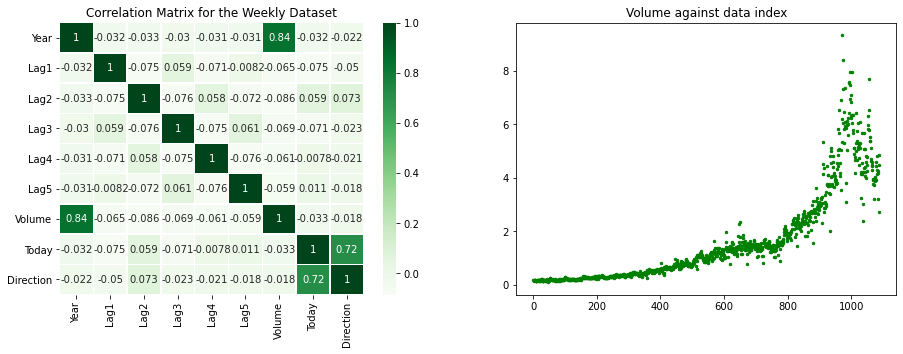

In [4]:
# see the correlation between different predictors
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
corr = data.drop('Intercept',axis=1).corr()
sn.heatmap(corr, linewidths=.5 ,cmap='Greens',annot=True)         ;      
plt.title('Correlation Matrix for the Weekly Dataset') ;

# plot 'Volume' against index
plt.subplot(1,2,2)
plt.scatter(data.index,data['Volume'],c='g',s=6) ;
plt.title('Volume against data index')           ;

#### b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

Only Lag2 is statistically significant.

In [5]:
features = ['Intercept','Lag1','Lag2','Lag3','Lag4','Lag5','Volume']
X = data[features]
y = data['Direction']
log_reg = sm.Logit(y,X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 21 Mar 2021   Pseudo R-squ.:                0.006580
Time:                        22:04:00   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

#### c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

Even when training on the full dataset, the overall accurately rate is only at 56.1%. Furthermore, from the confusion matrix, we found that:   

True negative rate (specificity) is at:  0.1115  
True positive rate (sensitivity) is at:  0.9206   

The overall accuracy rate suffers because of the low specificity of the test, that given that the true direction of the market will be down, more than 80% of the time, the prediction given by our model will be that the market will be up.

In [6]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


Confusion_matrix
[[0.11157025 0.88842975]
 [0.07933884 0.92066116]] 

Accuracy Score: 0.5611


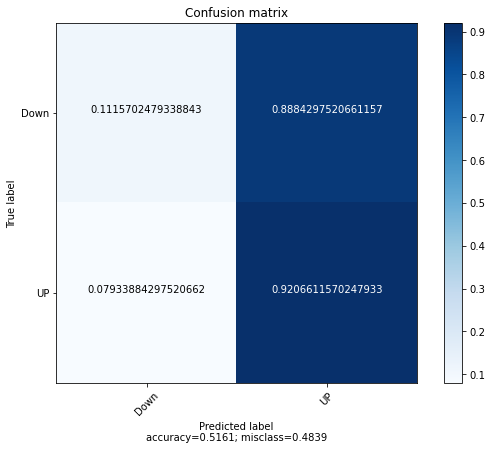

In [13]:
y_predclass = np.where(log_reg.predict(X)>0.5, 1,0 )
cm = confusion_matrix(y,y_predclass,normalize='true')
print('')
print('Confusion_matrix')
print(cm,'\n')
print("Accuracy Score:",round(accuracy_score(y,y_predclass),4))


plot_confusion_matrix(cm,
                          target_names= ['Down','UP'],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)



#### First define 2 functions for part (d) onwards:
     1. eval_logred_model
     2. eval_lda_model

In [9]:
def eval_logreg_model(train_set,test_set,lst):
    X_train = train_set[lst]
    X_test = test_set[lst]
    y_train = train_set['Direction']
    y_test = test_set['Direction']
    
    log_reg = sm.Logit(y_train,X_train).fit()
    print(log_reg.summary(),'\n')
    
    # Predict on test set and take 0.5 as the classifying threshold
    y_predclass = np.where(log_reg.predict(X_test)>0.5, 1,0 )
    
    # Confusion matrix
    cm = confusion_matrix(y_test,y_predclass)
    print('Confusion_matrix and Accuracy Score for Linear Regression model')
    print(cm)
    print("Accuracy Score:",accuracy_score(y_test,y_predclass))

def eval_lda_model(train_set,test_set,lst):
    X_train = train_set[lst]
    X_test = test_set[lst]
    y_train = train_set['Direction']
    y_test = test_set['Direction']

    lda =LDA().fit(X_train,y_train)
    y_predclass = lda.predict(X_test)
    cm = confusion_matrix(y_test,y_predclass)
    print("")
    print("Confusion matrix and Accuracy Score for LDA")
    print(cm)
    print("Accuracy Score:",accuracy_score(y_test,y_predclass))

#### (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matribx and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [12]:
train_set = data[data['Year']<=2008]
test_set = data[data['Year']>2008]

In [13]:
features = ['Intercept','Lag2']
eval_logreg_model(train_set,test_set,features)

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Sun, 21 Mar 2021   Pseudo R-squ.:                0.003076
Time:                        22:04:43   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

#### (e) Repeat (d) using LDA.

In [11]:
eval_lda_model(train_set,test_set,features)


Confusion matrix and Accuracy Score for LDA
[[ 9 34]
 [ 5 56]]
Accuracy Score: 0.625


#### (h) Which of these methods appears to provide the best results on this data? 

Comparing just LDA with logistic regression, Both LDA and Logistic regression gives the same confusion matrix and accuracy rate.

#### (i) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

After experimenting with different combination of predictors in both logistic regression and LDA method,

It can be observed that Lag2 is the most important predictor, excluding Lag2 as a predictor will reduce the prediction accuracy and incoporating other predictors alongside with Lag2 does not help to improve the accuracy score of both logistic regression and lda.

#### Using Lag2 and Volume as predictors

In [82]:
features = ['Intercept','Lag2','Volume']
eval_logreg_model(train_set,test_set,features)
eval_lda_model(train_set,test_set,features)

Optimization terminated successfully.
         Current function value: 0.684972
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      982
Method:                           MLE   Df Model:                            2
Date:                Thu, 04 Mar 2021   Pseudo R-squ.:                0.003924
Time:                        18:41:09   Log-Likelihood:                -674.70
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.07012
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2707      0.090      3.006      0.003       0.094       0.447
Lag2           0.0535      0.

#### Using Lag1 and Lag2 and Volume as predictors

In [12]:
features = ['Intercept','Lag1','Lag2','Volume']
eval_logreg_model(train_set,test_set,features)
eval_lda_model(train_set,test_set,features)

Optimization terminated successfully.
         Current function value: 0.682811
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Wed, 17 Mar 2021   Pseudo R-squ.:                0.007065
Time:                        07:57:19   Log-Likelihood:                -672.57
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.02259
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2979      0.091      3.261      0.001       0.119       0.477
Lag1          -0.0597      0.

#### Using Lag1 and Lag2 and Lag3 and Volume as predictors

In [16]:
features = ['Intercept','Lag1','Lag2','Lag3','Volume']
eval_logreg_model(train_set,test_set,features)
eval_lda_model(train_set,test_set,features)

Optimization terminated successfully.
         Current function value: 0.682691
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      980
Method:                           MLE   Df Model:                            4
Date:                Wed, 17 Mar 2021   Pseudo R-squ.:                0.007240
Time:                        07:58:22   Log-Likelihood:                -672.45
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04379
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3040      0.092      3.295      0.001       0.123       0.485
Lag1          -0.0591      0.

#### Using Lag1 Lag3 Lag4 and Vol as predictors

In [15]:
features = ['Intercept','Lag1','Lag3','Lag4','Volume']
eval_logreg_model(train_set,test_set,features)
eval_lda_model(train_set,test_set,features)

Optimization terminated successfully.
         Current function value: 0.683543
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      980
Method:                           MLE   Df Model:                            4
Date:                Sun, 21 Mar 2021   Pseudo R-squ.:                0.006001
Time:                        22:05:08   Log-Likelihood:                -673.29
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.08693
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3394      0.092      3.693      0.000       0.159       0.520
Lag1          -0.0654      0.